In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# sns.reset_orig()
plt.rcParams["lines.linewidth"] = 1.5


In [37]:
data = pd.read_csv("../data/TD3BCHopper.csv")
data.columns


Index(['Step', 'Prod-TD3-BC-hopper-medium-v2-d61c0710 - d4rl_normalized_score',
       'Prod-TD3-BC-hopper-medium-v2-d61c0710 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-hopper-medium-v2-d61c0710 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainAC10k-hopper-medium-v2-84598b88 - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainAC10k-hopper-medium-v2-84598b88 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-pretrainAC10k-hopper-medium-v2-84598b88 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainBC10k-hopper-medium-v2-95dda9f2 - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainBC10k-hopper-medium-v2-95dda9f2 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-pretrainBC10k-hopper-medium-v2-95dda9f2 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-alpha10-noLN-hopper-medium-v2-139e30e6 - d4rl_normalized_score',
       'Prod-TD3-BC-alpha10-noLN-hopper-medium-v2-139e30e6 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-alpha10-noLN-hopper-medium-v2-139e3

In [38]:
data = data[data["Step"] < 500001]


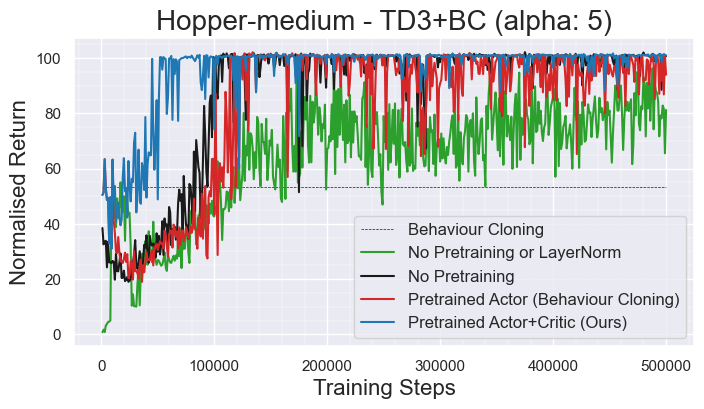

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(
    data["Step"],
    53.2 * np.ones_like(data["Step"]),
    label="Behaviour Cloning",
    linestyle="--",
    color="k",
    linewidth=0.5,
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-alpha10-noLN-hopper-medium-v2-139e30e6 - d4rl_normalized_score"],
    label="No Pretraining or LayerNorm",
    color="tab:green",
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-hopper-medium-v2-d61c0710 - d4rl_normalized_score"],
    label="No Pretraining",
    color="k",
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-pretrainBC10k-hopper-medium-v2-95dda9f2 - d4rl_normalized_score"],
    label="Pretrained Actor (Behaviour Cloning)",
    color="tab:red",
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-pretrainAC10k-hopper-medium-v2-84598b88 - d4rl_normalized_score"],
    label="Pretrained Actor+Critic (Ours)",
    color="tab:blue",
)
ax.legend(loc="lower right", fontsize=12)
ax.set_title("Hopper-medium - TD3+BC (alpha: 5)", fontsize=20)
ax.set_xlabel("Training Steps", fontsize=16)
ax.set_ylabel("Normalised Return", fontsize=16)
ax.grid(visible=True, which="major")
ax.grid(visible=True, which="minor", linewidth=0.3)
ax.minorticks_on()
plt.show()
# fig.savefig("../plots/TD3BCHopper.pdf")
